In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import klib


<div style="background-color: #f0f8ff; border-left: 6px solid #2196F3; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #2196F3; border-bottom: 2px solid #2196F3; padding-bottom: 5px;">🚀 Step 1: Importing Essential Libraries</h2>
  <p>Let's start by importing the foundational libraries for our analysis. These include:</p>
  <ul>
    <li><code>pandas</code>: For data manipulation and analysis, especially for working with DataFrames.</li>
    <li><code>numpy</code>: For numerical operations, particularly array manipulations.</li>
    <li><code>seaborn</code> and <code>matplotlib.pyplot</code>: For creating insightful and visually appealing data visualizations.</li>
    <li><code>klib</code>: A handy library for quick data cleaning and preprocessing tasks.</li>
  </ul>
</div>


In [41]:
df = pd.read_csv('Banking.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



<div style="background-color: #e6ffe6; border-left: 6px solid #4CAF50; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #4CAF50; border-bottom: 2px solid #4CAF50; padding-bottom: 5px;">📊 Step 2: Loading and Inspecting the Data</h2>
  <p>Now, we load our banking dataset from a CSV file into a pandas DataFrame. We then take a first look at the data using <code>df.head()</code> to understand its structure and the type of information it contains.</p>
</div>


In [42]:
df.info()

df.drop(columns= ['CustomerId','Surname','RowNumber'], inplace=True)
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB



<div style="background-color: #fff0e6; border-left: 6px solid #FF9800; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #FF9800; border-bottom: 2px solid #FF9800; padding-bottom: 5px;">🧹 Step 3: Data Cleaning and Preprocessing</h2>
  <p>In this crucial step, we perform initial data cleaning:</p>
  <ul>
    <li><code>df.info()</code>: Provides a concise summary of the DataFrame, including data types and non-null values for each column.</li>
    <li><strong>Dropping Unnecessary Columns</strong>: We remove columns like 'CustomerId', 'Surname', and 'RowNumber' as they are unlikely to contribute to churn prediction.</li>
    <li><strong>Handling Missing Values</strong>: <code>df.dropna(inplace=True)</code> removes rows with any missing values to ensure data integrity for subsequent analysis.</li>
  </ul>
</div>


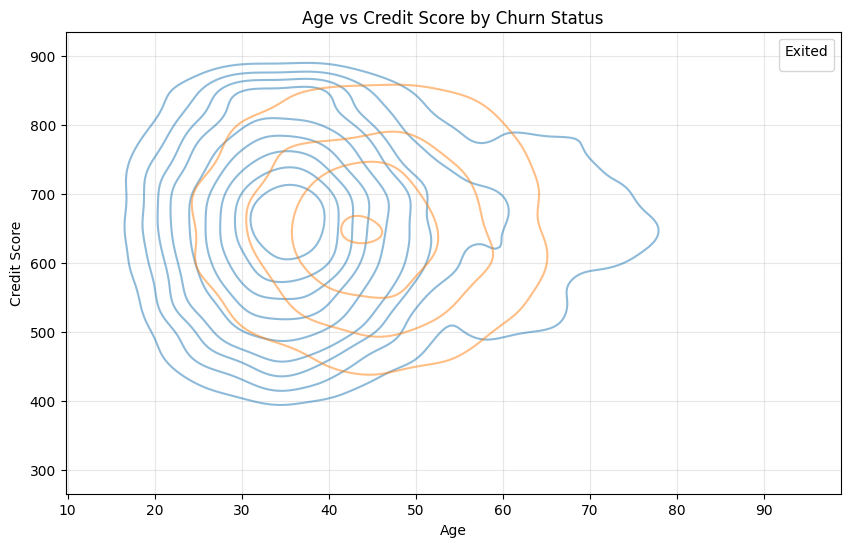

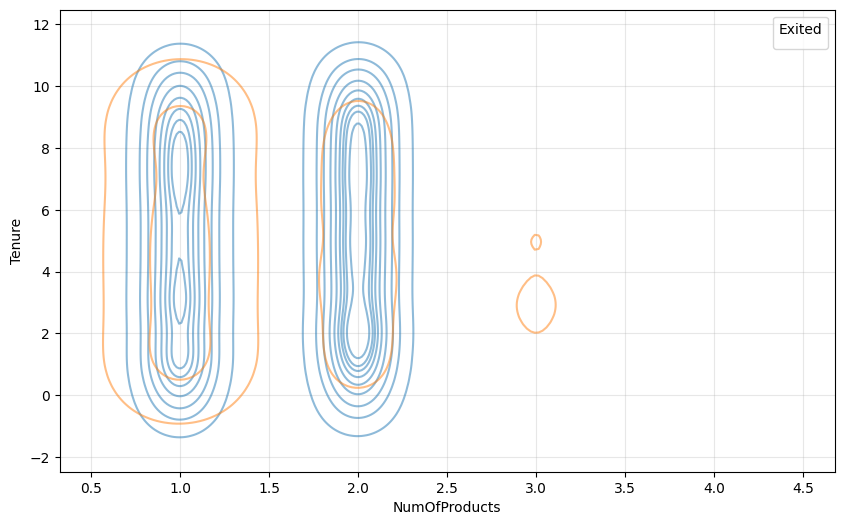

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', y='CreditScore', hue='Exited', alpha=0.5)
plt.title('Age vs Credit Score by Churn Status')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='NumOfProducts', y='Tenure', hue='Exited', alpha=0.5)
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.grid(alpha=0.3)
plt.show()


<div style="background-color: #e3f2fd; border-left: 6px solid #03A9F4; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #03A9F4; border-bottom: 2px solid #03A9F4; padding-bottom: 5px;">📈 Step 4: Exploratory Data Analysis (EDA) - Visualizing Relationships</h2>
  <p>We dive into visualizing the data to uncover potential patterns related to customer churn (<code>Exited</code>).</p>
  <ul>
    <li><strong>Age vs. Credit Score</strong>: A Kernel Density Estimate (KDE) plot helps us see the distribution of customers based on their age and credit score, segmented by whether they churned or not.</li>
    <li><strong>Number of Products vs. Tenure</strong>: Another KDE plot explores the relationship between the number of products a customer holds, their tenure with the bank, and churn status.</li>
  </ul>
  <p>These visualizations can offer initial clues about factors influencing churn.</p>
</div>


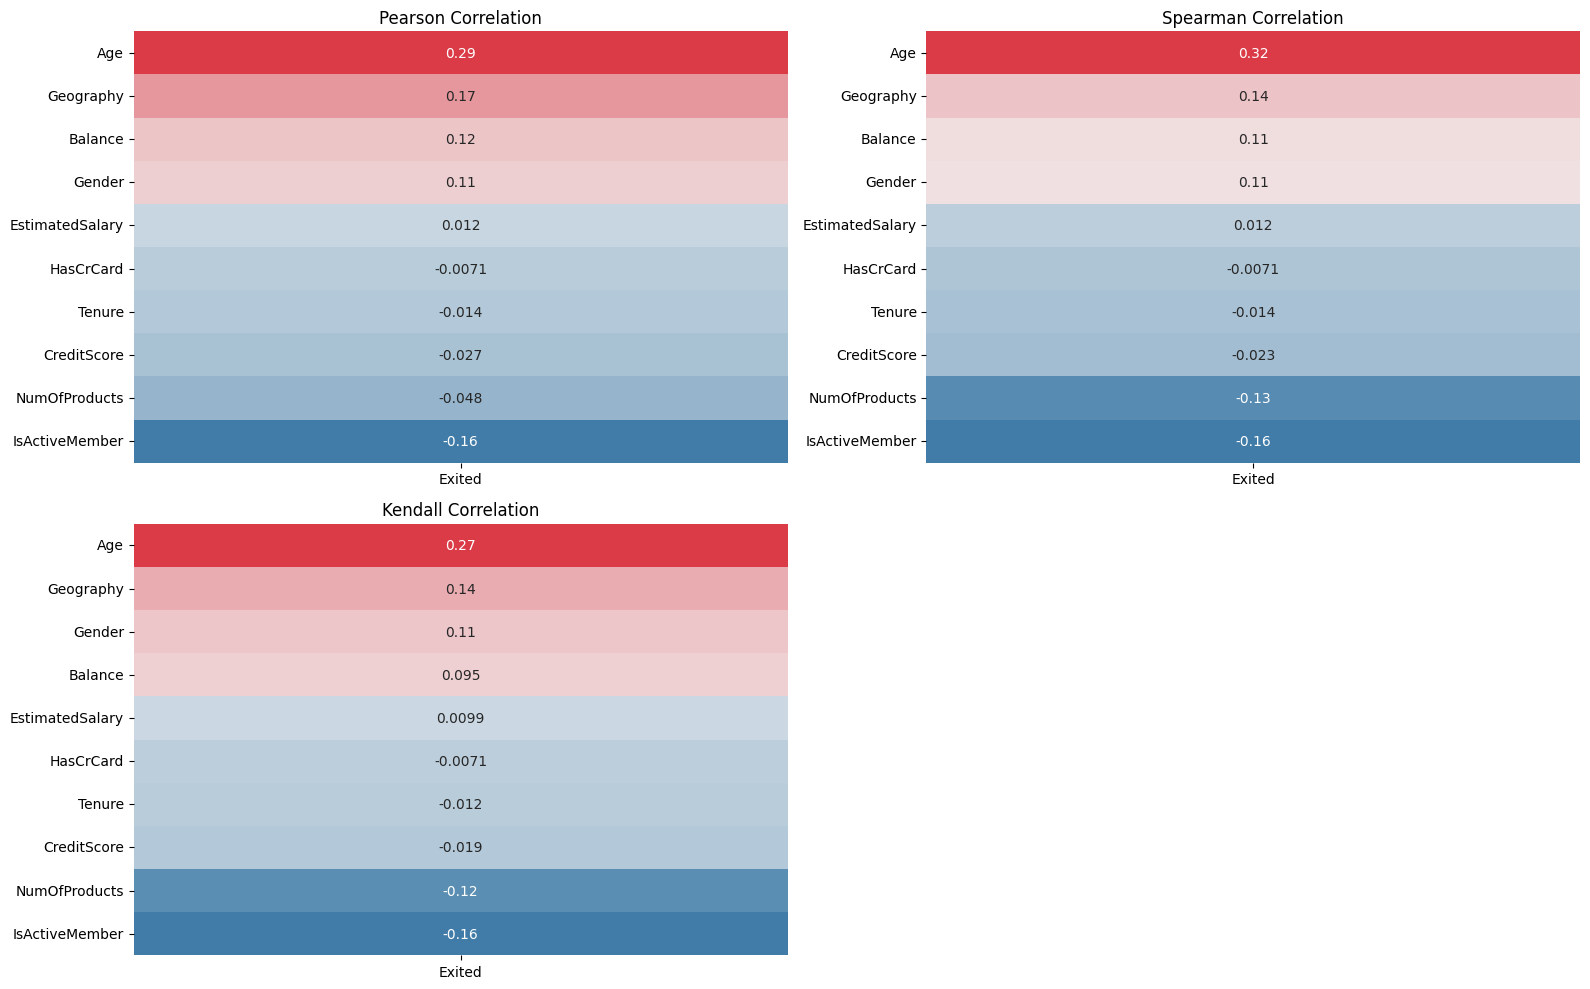

In [44]:
from category_encoders import TargetEncoder

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
te = TargetEncoder(cols=cat_cols)
df[cat_cols] = te.fit_transform(df[cat_cols], df['Exited'])


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

methods = ['pearson', 'spearman', 'kendall']
titles = ['Pearson Correlation', 'Spearman Correlation', 'Kendall Correlation']

for ax, method, title in zip(axes[:3], methods, titles):
    corr_exited = df.corr(method=method)['Exited'] \
                   .sort_values(ascending=False) \
                   .to_frame()[1:]
    camp = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr_exited, annot=True, cmap=camp, cbar=False, ax=ax)
    ax.set_title(title)

axes[-1].axis('off')
plt.tight_layout()
plt.show()



<div style="background-color: #fce4ec; border-left: 6px solid #E91E63; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #E91E63; border-bottom: 2px solid #E91E63; padding-bottom: 5px;">🔗 Step 5: Feature Encoding and Correlation Analysis</h2>
  <p>To prepare our data for machine learning models, we handle categorical features and analyze correlations:</p>
  <ul>
    <li><strong>Target Encoding</strong>: Categorical columns (<code>cat_cols</code>) are converted into numerical representations using <code>TargetEncoder</code>. This method replaces each category with the mean of the target variable (<code>Exited</code>) for that category.</li>
    <li><strong>Correlation Heatmaps</strong>: We generate heatmaps using Pearson, Spearman, and Kendall correlation methods. These visualize the strength and direction of linear and monotonic relationships between different features and the target variable 'Exited'. This helps identify potentially predictive features.</li>
  </ul>
</div>


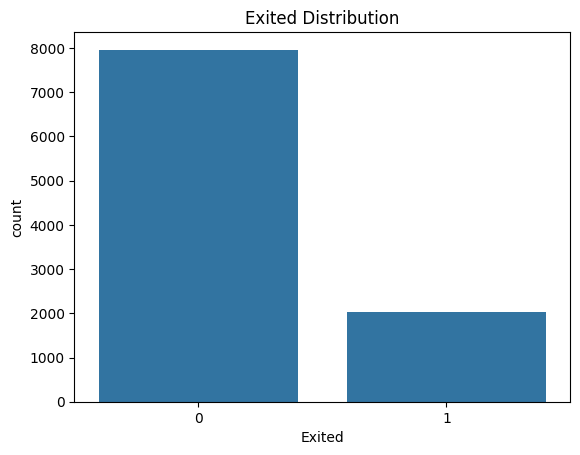

In [45]:
sns.countplot(x='Exited', data=df)
plt.title('Exited Distribution')
plt.show()


<div style="background-color: #e0f7fa; border-left: 6px solid #00BCD4; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #00BCD4; border-bottom: 2px solid #00BCD4; padding-bottom: 5px;">📊 Step 6: Visualizing Churn Distribution</h2>
  <p>A simple countplot is used to visualize the distribution of the target variable 'Exited'. This shows us the balance (or imbalance) between customers who churned and those who did not. Understanding this distribution is important, especially for handling imbalanced datasets.</p>
</div>


In [46]:
df['CAR'] = df['CreditScore'] / df['Age']
df['CSR'] = df['CreditScore'] / df['EstimatedSalary']
df['TPA'] = df['Tenure'] / df['Age']



df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.fillna(0, inplace=True) 


<div style="background-color: #f9fbe7; border-left: 6px solid #CDDC39; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #CDDC39; border-bottom: 2px solid #CDDC39; padding-bottom: 5px;">🛠️ Step 7: Feature Engineering</h2>
  <p>We create new features from existing ones to potentially capture more complex relationships and improve model performance. The new features are:</p>
  <ul>
    <li><code>CAR</code> (Credit Score to Age Ratio): <code>CreditScore / Age</code></li>
    <li><code>CSR</code> (Credit Score to Estimated Salary Ratio): <code>CreditScore / EstimatedSalary</code></li>
    <li><code>TPA</code> (Tenure to Products Ratio - <em>Corrected to Tenure to Age Ratio based on code</em>): <code>Tenure / Age</code></li>
  </ul>
  <p>After creating these features, we handle any potential infinite values (<code>inf</code>, <code>-inf</code>) by replacing them with <code>pd.NA</code> and then fill any remaining missing values (<code>NA</code>) with 0.</p>
</div>


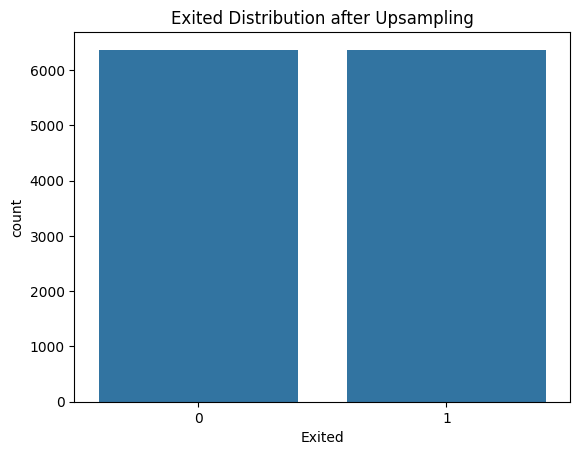

Train shape: (12740, 9), (12740,)
Test shape: (2000, 9), (2000,)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

l1 = ['Age', 'IsActiveMember','Gender','NumOfProducts']
l2 = ['CreditScore', 'Balance', 'Tenure', 'EstimatedSalary','Geography']
l3= [ 'Age', 'IsActiveMember','Gender','NumOfProducts','CreditScore', 'Balance','Geography','CAR','CSR','TPA']

sdf1 = df[l1]
sdf2= df[l2]
sdf3= df[l3]
train_x, test_x, train_y , test_y =  train_test_split(sdf3, df['Exited'], test_size=0.2, random_state=42,stratify=df['Exited'])


train_x = pd.concat([train_x, train_y], axis=1)
df_majority = train_x[train_x['Exited'] == 0]
df_minority = train_x[train_x['Exited'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42) 


train_x = pd.concat([df_majority, df_minority_upsampled])
sns.countplot(x='Exited', data=train_x )
plt.title('Exited Distribution after Upsampling')
plt.show()

train_y = train_x['Exited']
train_x.drop(columns=['Exited'], inplace=True)


categorical_cols_to_keep = ['Gender', 'Geography', 'IsActiveMember']
categorical_cols_to_keep = [col for col in categorical_cols_to_keep if col in train_x.columns]

numerical_cols_to_scale = [col for col in train_x.columns if col not in categorical_cols_to_keep]

train_x_numerical = train_x[numerical_cols_to_scale]
train_x_categorical = train_x[categorical_cols_to_keep]

test_x_numerical = test_x[numerical_cols_to_scale]
test_x_categorical = test_x[categorical_cols_to_keep]

scaler = StandardScaler()
train_x_numerical_scaled = scaler.fit_transform(train_x_numerical)
test_x_numerical_scaled = scaler.transform(test_x_numerical)

train_x_numerical_scaled_df = pd.DataFrame(train_x_numerical_scaled, columns=numerical_cols_to_scale, index=train_x_numerical.index)
test_x_numerical_scaled_df = pd.DataFrame(test_x_numerical_scaled, columns=numerical_cols_to_scale, index=test_x_numerical.index)


train_x = pd.concat([train_x_numerical_scaled_df.reset_index(drop=True), train_x_categorical.reset_index(drop=True)], axis=1)
test_x = pd.concat([test_x_numerical_scaled_df.reset_index(drop=True), test_x_categorical.reset_index(drop=True)], axis=1)





print(f"Train shape: {train_x.shape}, {train_y.shape}")
print(f"Test shape: {test_x.shape}, {test_y.shape}")


<div style="background-color: #efebe9; border-left: 6px solid #795548; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #795548; border-bottom: 2px solid #795548; padding-bottom: 5px;">⚙️ Step 8: Data Splitting, Upsampling, and Scaling</h2>
  <p>This is a critical preprocessing phase before model training:</p>
  <ul>
    <li><strong>Feature Selection</strong>: We define lists of features (<code>l1</code>, <code>l2</code>, <code>l3</code>) and select <code>l3</code> for our model (<code>sdf3</code>).</li>
    <li><strong>Train-Test Split</strong>: The data is split into training and testing sets (80% train, 20% test) using <code>train_test_split</code>. Stratification by 'Exited' ensures that both sets have a similar proportion of churned customers.</li>
    <li><strong>Upsampling Minority Class</strong>: To address class imbalance (where one class is much less frequent than the other), we upsample the minority class (<code>Exited == 1</code>) in the <em>training data</em>. This involves randomly duplicating instances from the minority class until it matches the size of the majority class. We then visualize the 'Exited' distribution in the training set to confirm the upsampling.</li>
    <li><strong>Feature Scaling</strong>: Numerical features are scaled using <code>StandardScaler</code>. This standardizes features by removing the mean and scaling to unit variance. Scaling is applied separately to numerical columns, while categorical columns are kept as is. The scaler is fitted <em>only</em> on the training data and then used to transform both training and testing data to prevent data leakage.</li>
    <li><strong>Final Data Preparation</strong>: The scaled numerical features and the original categorical features are concatenated back together for both training and testing sets.</li>
  </ul>
  <p>Finally, we print the shapes of our processed training and testing datasets to verify the dimensions.</p>
</div>


================================== SVM ==================================
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



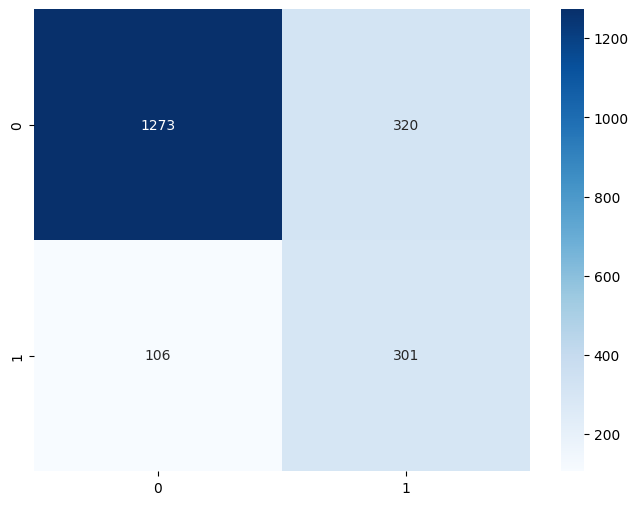

================================== Random Forest ==================================
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.53      0.59       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000

================================== XGBoost ==================================
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1593
           1       0.59      0.63      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000



c:\Users\ABDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


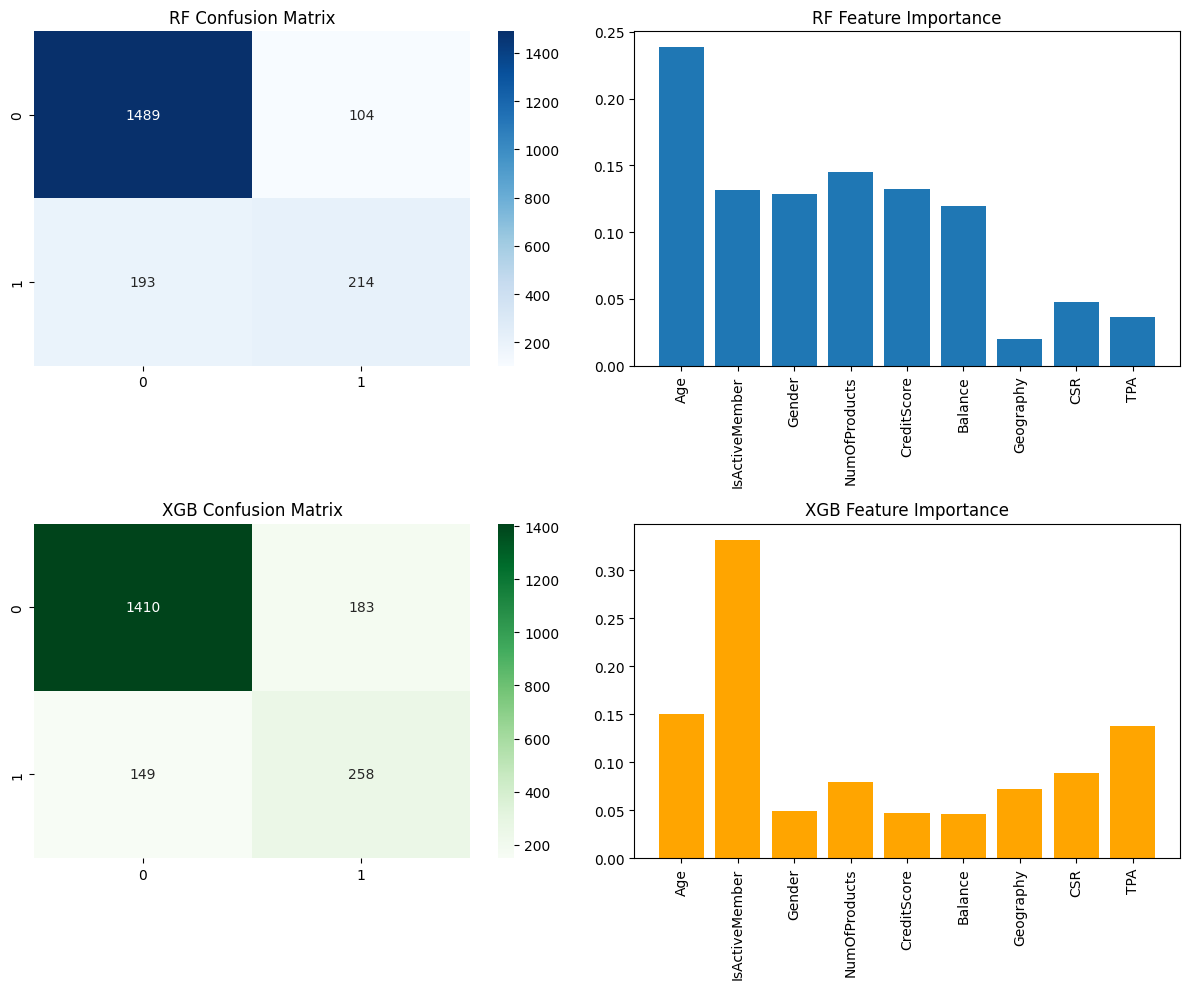

In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

svm = SVC()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

svm.fit(train_x, train_y)
rf.fit(train_x, train_y)

y_pred_svm = svm.predict(test_x)
y_pred_rf = rf.predict(test_x)

print('================================== SVM ==================================')
print(classification_report(test_y, y_pred_svm))
cm = confusion_matrix(test_y, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print('================================== Random Forest ==================================')
print(classification_report(test_y, y_pred_rf))
cm_rf = confusion_matrix(test_y, y_pred_rf)


print('================================== XGBoost ==================================')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(train_x, train_y)
y_pred_xgb = xgb.predict(test_x)

print(classification_report(test_y, y_pred_xgb))
cm_xgb = confusion_matrix(test_y, y_pred_xgb)




fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# RF Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('RF Confusion Matrix')

# RF Feature Importance
importances_rf = rf.feature_importances_
axes[1].bar(range(len(importances_rf)), importances_rf, tick_label=l3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('RF Feature Importance')

# XGB Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('XGB Confusion Matrix')

# XGB Feature Importance
importances_xgb = xgb.feature_importances_
axes[3].bar(range(len(importances_xgb)), importances_xgb, color='orange', tick_label=l3)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_title('XGB Feature Importance')

plt.tight_layout()
plt.show()


<div style="background-color: #f3e5f5; border-left: 6px solid #9C27B0; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #9C27B0; border-bottom: 2px solid #9C27B0; padding-bottom: 5px;">🧠 Step 9: Model Training and Evaluation (SVM, Random Forest, XGBoost)</h2>
  <p>We train and evaluate several popular machine learning models:</p>
  <ul>
    <li><strong>Support Vector Machine (SVM)</strong>: A powerful classifier that finds an optimal hyperplane to separate classes.</li>
    <li><strong>Random Forest Classifier</strong>: An ensemble learning method that builds multiple decision trees and merges their predictions.</li>
    <li><strong>XGBoost Classifier</strong>: A gradient boosting algorithm known for its high performance and efficiency.</li>
  </ul>
  <p>For each model:</p>
  <ol>
    <li>We initialize and train the model on the preprocessed training data (<code>train_x</code>, <code>train_y</code>).</li>
    <li>We make predictions on the test data (<code>test_x</code>).</li>
    <li>We print a <strong>classification report</strong>, which includes precision, recall, F1-score, and support for each class.</li>
    <li>We display a <strong>confusion matrix</strong> to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.</li>
  </ol>
  <p>Additionally, for Random Forest and XGBoost, we visualize <strong>feature importances</strong> to understand which features contribute most to their predictions.</p>
</div>


================================== PyTorch NN ==================================
Using device: cuda


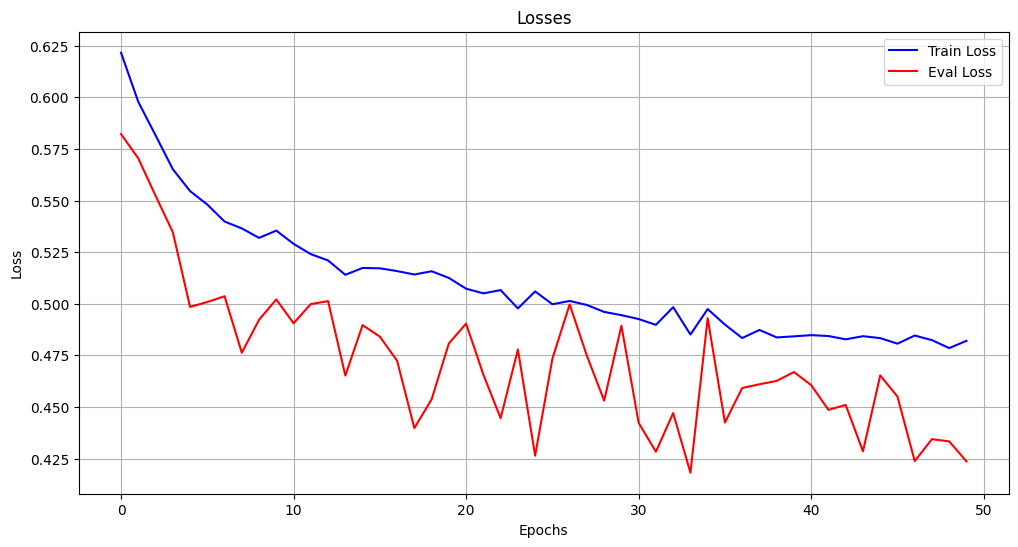

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1593
         1.0       0.64      0.63      0.64       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



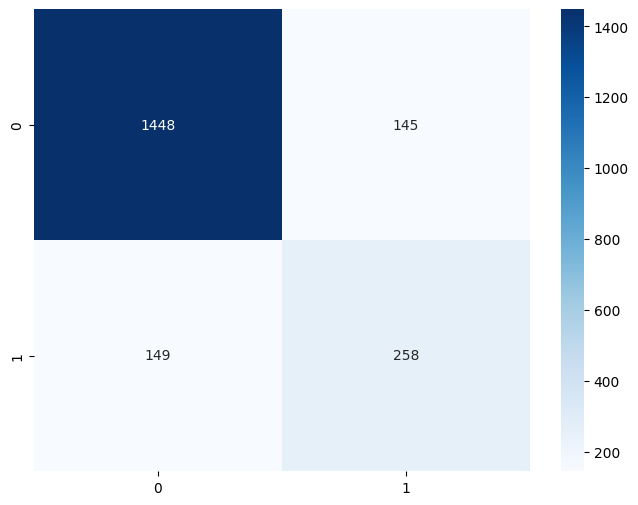

In [69]:
print('================================== PyTorch NN ==================================')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

X_train = torch.tensor(train_x.values, dtype=torch.float32).to(device) # Convert to NumPy array
# Ensure y_train is float and has shape (batch_size, 1) for BCEWithLogitsLoss
y_train = torch.tensor(train_y.values, dtype=torch.float32).unsqueeze(1).to(device)
X_test  = torch.tensor(test_x.values,  dtype=torch.float32).to(device) # Convert to NumPy array
# Ensure y_test is float and has shape (batch_size, 1) for BCEWithLogitsLoss
y_test  = torch.tensor(test_y.values, dtype=torch.float32).unsqueeze(1).to(device)

train_ds = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

class Net(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.drop = nn.Dropout(0.2)
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, 16)
        self.bn5 = nn.BatchNorm1d(16)
        self.out = nn.Linear(16, 1)
        
        self.act = nn.Sigmoid() # Sigmoid will be applied outside or by BCEWithLogitsLoss
    
    def forward(self, x):
        x = self.drop(self.act(self.bn1(self.fc1(x))))
        x = self.drop(self.act(self.bn2(self.fc2(x))))
        x = self.drop(self.act(self.bn3(self.fc3(x))))
        x = self.drop(self.act(self.bn4(self.fc4(x))))
        x = self.bn5(self.fc5(x)) # Raw logits from fc5
        # Return raw logits for BCEWithLogitsLoss
        return self.out(x)

model = Net(X_train.shape[1])
model.to(device)
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
eval_losses  = []
num_epochs = 50

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device) # yb is already (batch_size, 1) and float
        optimizer.zero_grad()
        out   = model(xb) # out is raw logits
        loss  = criterion(out, yb) # yb should be float and same shape as out
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_train_loss = running_loss / len(train_ds)
    train_losses.append(epoch_train_loss)

    # --- eval ---
    model.eval()
    with torch.no_grad():
        logits = model(X_test) # logits are raw
        epoch_eval_loss = criterion(logits, y_test).item() # y_test is already (N, 1) and float
    eval_losses.append(epoch_eval_loss)



plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(eval_losses, label='Eval Loss', color='red')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


model.eval()
with torch.no_grad():
    logits = model(X_test) # Raw logits
    # Apply sigmoid and threshold for predictions
    preds = (torch.sigmoid(logits) > 0.598).long().squeeze().cpu()



# Ensure y_test_np is 1D for metrics
y_test_np = y_test.squeeze().cpu().numpy()
preds_np  = preds.cpu().numpy() # preds is already 1D
print(classification_report(y_test_np, preds_np))
cm = confusion_matrix(y_test_np, preds_np)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


<div style="background-color: #ede7f6; border-left: 6px solid #673AB7; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #673AB7; border-bottom: 2px solid #673AB7; padding-bottom: 5px;">🧠 Step 10: Model Training and Evaluation (PyTorch Neural Network)</h2>
  <p>We now build, train, and evaluate a Neural Network using PyTorch:</p>
  <ol>
    <li><strong>Device Configuration</strong>: We check for GPU availability (CUDA) and set the device accordingly.</li>
    <li><strong>Data Conversion to Tensors</strong>: The training and testing data (features and target) are converted into PyTorch tensors. The target variable is also unsqueezed to match the expected input shape for the loss function.</li>
    <li><strong>DataLoader Setup</strong>: A <code>DataLoader</code> is created for the training set to handle batching and shuffling of data during training.</li>
    <li><strong>Neural Network Architecture (<code>Net</code> class)</strong>: A sequential neural network is defined with several linear layers, batch normalization, dropout for regularization, and Sigmoid activation functions. The final layer outputs raw logits.</li>
    <li><strong>Model Initialization, Loss Function, and Optimizer</strong>:
        <ul>
            <li>The model (<code>Net</code>) is instantiated and moved to the configured device.</li>
            <li><code>BCEWithLogitsLoss</code> is chosen as the loss function, suitable for binary classification problems as it combines a Sigmoid layer and Binary Cross Entropy loss in one single class, offering numerical stability.</li>
            <li>The Adam optimizer is selected for updating the model's weights.</li>
        </ul>
    </li>
    <li><strong>Training Loop</strong>:
        <ul>
            <li>The model is trained for a specified number of epochs.</li>
            <li>In each epoch, the model iterates through the training data in batches.</li>
            <li>For each batch, forward pass, loss calculation, backward pass (gradient computation), and optimizer step (weight update) are performed.</li>
            <li>Training loss for the epoch is calculated and stored.</li>
            <li><strong>Evaluation</strong>: After each training epoch, the model is set to evaluation mode (<code>model.eval()</code>), and the loss is calculated on the entire test set (<code>X_test</code>, <code>y_test</code>) without gradient computation. This evaluation loss is also stored.</li>
        </ul>
    </li>
    <li><strong>Loss Visualization</strong>: The training and evaluation losses are plotted over epochs to monitor the learning process and check for overfitting.</li>
    <li><strong>Final Evaluation on Test Set</strong>:
        <ul>
            <li>The trained model makes predictions on the test set. Raw logits are obtained from the model.</li>
            <li>These logits are passed through a Sigmoid function, and a threshold (0.598 in this case) is applied to convert probabilities into binary class predictions (0 or 1).</li>
            <li>A <strong>classification report</strong> and a <strong>confusion matrix</strong> are generated to assess the neural network's performance on the unseen test data.</li>
        </ul>
    </li>
  </ol>
</div>



<div style="background-color: #fafafa; border-left: 6px solid #757575; padding: 10px; margin-bottom: 15px;">
  <h2 style="color: #757575; border-bottom: 2px solid #757575; padding-bottom: 5px;">🎉 Conclusion & Next Steps</h2>
  <p>This notebook walked through the process of predicting bank customer churn. We covered:</p>
  <ul>
    <li>Data loading and initial cleaning.</li>
    <li>Exploratory data analysis and visualization.</li>
    <li>Feature engineering and encoding.</li>
    <li>Data preprocessing including handling imbalanced classes and feature scaling.</li>
    <li>Training and evaluating various machine learning models: SVM, Random Forest, XGBoost, and a PyTorch Neural Network.</li>
  </ul>
  <p><strong>Potential Next Steps could include:</strong></p>
  <ul>
    <li>Hyperparameter tuning for the models to potentially improve performance.</li>
    <li>Exploring other feature engineering techniques.</li>
    <li>Trying different architectures or more advanced techniques for the neural network.</li>
    <li>Investigating ensemble methods combining predictions from multiple models.</li>
    <li>Deploying the best performing model for real-world churn prediction.</li>
  </ul>
</div>
